## Titanic Dataset EDA: Uncovering Patterns & Predictions from Passenger Data

In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Cleaning & Preprocessing

   - How would you handle missing values in 'Age', 'Embarked', and 'Cabin'?
   - Should you drop or keep the 'Name' column?
   - How do you handle outliers in 'Fare'?

In [4]:
# loading titanic data-set from seaborn
titanic=pd.read_csv('./titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# some sample from titanic dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [6]:
# finding missing values in dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

as we can see `age`, `cabin` and `embarked` all contains missing values

In [8]:
# filling missing age with values of above row
titanic.Age.ffill(inplace=True)

In [9]:
# filling `nan` values of Cabin with `most frequent Cabin` value
most_frequent_Cabin=titanic.Cabin.mode()[0]
most_frequent_Cabin

'B96 B98'

In [10]:
titanic['Cabin'].fillna(most_frequent_Cabin, inplace=True)

In [11]:
# alternatively we can also fill null values with `unknown` value, to do so
# first we've to update our categorical columns

# titanic['Cabin']=titanic['Cabin'].cat.add_categories(['Unknown'])
# # now we'll update our categorical column values
# titanic['Cabin']=titanic.Cabin.fillna('Unknown')

In [12]:
# detecting outliers in dataframe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


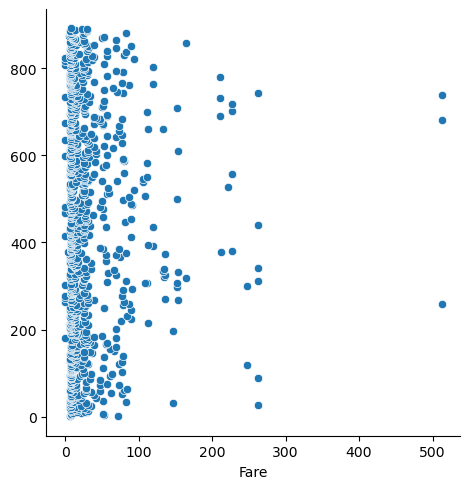

In [13]:
sns.relplot(kind='scatter', data=titanic, x='Fare', y=np.arange(1, 892))

In [14]:
# from the above observation we can see that the `fare` column contains outlier values 
# we'll handle by clipping values in range 0 to 300

titanic['Fare']=titanic.Fare.clip(0, 300)

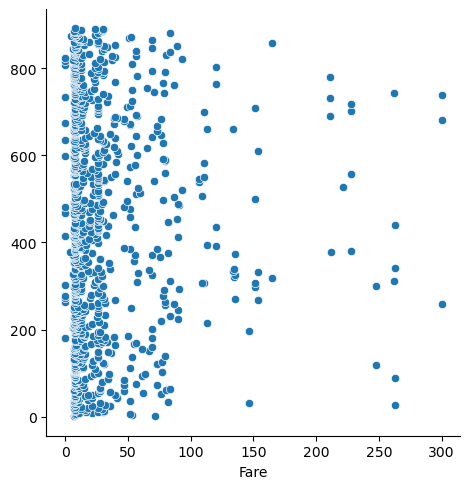

In [15]:
sns.relplot(kind='scatter', data=titanic, x='Fare', y=np.arange(1, 892))

now our data looks better

In [17]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [18]:
# handling null embarked values

titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
titanic.iloc[[60, 61, 62, 828, 829, 830]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,1.0,0,0,367228,7.7500,B96 B98,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,B96 B98,C


as we can see both the `nan` values are of *Sex* `female`, therefore we replace it with most frequest female embarked value

In [21]:
# finding most frequent female embarked value
most_frequent_female_embarked=titanic[titanic['Sex']=='female']['Embarked'].value_counts().sort_values(ascending=False)

In [22]:
# replacing values
titanic.Embarked.fillna(
    most_frequent_female_embarked.head(1).reset_index()['Embarked'].iloc[0],
    inplace=True
)

In [23]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
# detecting whether dataset has duplicate rows are not
titanic.duplicated().sum()

0

There are no duplicate rows present in the dataset, if it's there remove the duplicate using `drop_duplicates`

In [26]:
# updating 'Sex', 'Embarked', and 'Pclass' as category
titanic['Sex']=titanic.Sex.astype('category')
titanic['Embarked']=titanic.Embarked.astype('category')
titanic['Pclass']=titanic.Pclass.astype('category')

In [27]:
titanic['Survived']=titanic.Survived.astype(np.int8)

In [28]:
titanic['Parch']=titanic.Parch.astype(np.int8)

In [29]:
titanic['SibSp']=titanic.SibSp.astype(np.int8)

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int8    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(1), int8(3), object(3)
memory usage: 47.5+ KB


### 2. Univariate Analysis

   - What is the distribution of 'Age' and how does it affect our understanding of the dataset?
   - How would you analyze survival rates based on gender and class?

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='Age', ylabel='Count'>

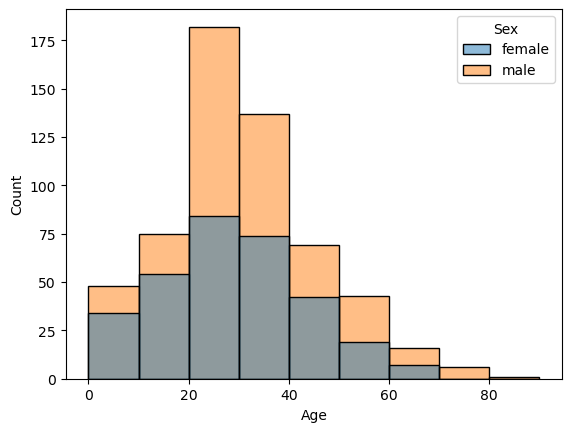

In [32]:
# distribution of `Age` variable
sns.histplot(data=titanic, x='Age', bins=np.arange(0, 100, 10), hue='Sex')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sex', ylabel='Fare'>

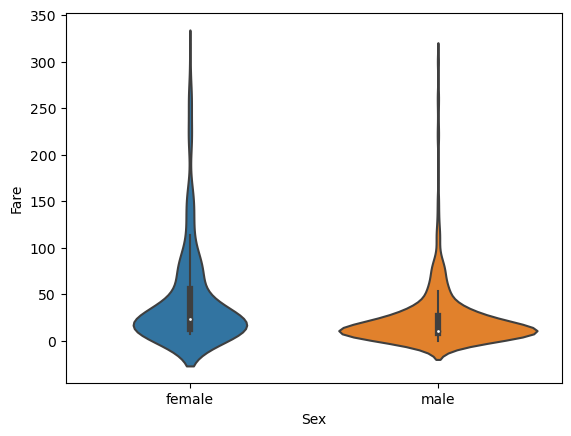

In [33]:
sns.violinplot(data=titanic, x='Sex', y='Fare')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='Fare', ylabel='Count'>

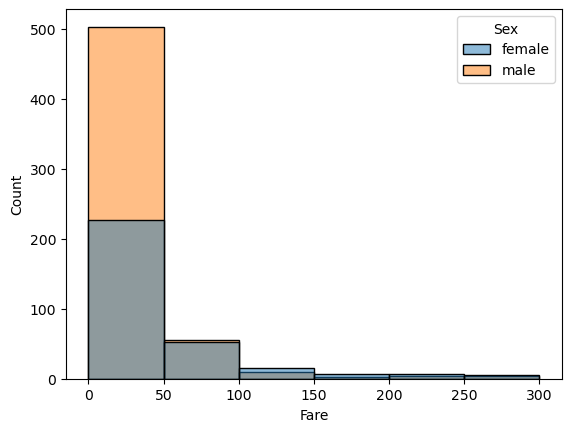

In [34]:
sns.histplot(data=titanic, x='Fare', bins=np.arange(0, 350, 50), hue='Sex')

In [35]:
# analysis of survival rate based on gender
male_survived=titanic[titanic['Sex']=='male']['Survived'].mean()

In [36]:
male_survived*=100

In [37]:
female_survived=titanic[titanic['Sex']=='female']['Survived'].mean()*100
female_survived

74.20382165605095

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sex', ylabel='Survived'>

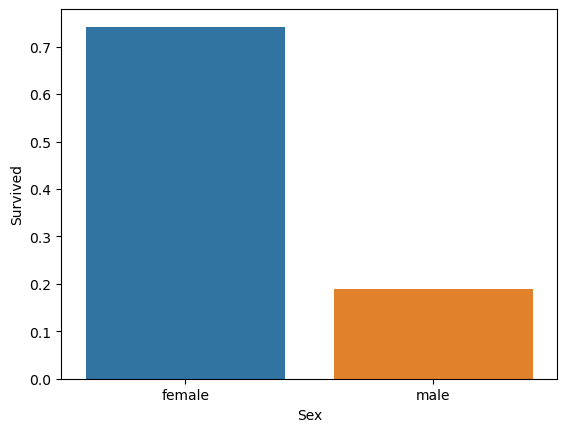

In [38]:
sns.barplot(data=titanic, x='Sex', y='Survived', errorbar=None)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='Survived'>

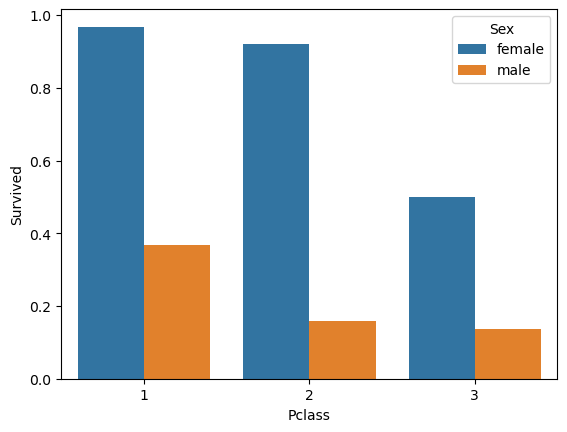

In [39]:
# How does the survival rate differ between the different passenger classes (Pclass)?
# What are the survival rates for passengers based on their 'Pclass'? 

sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex', errorbar=None)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked', ylabel='Count'>

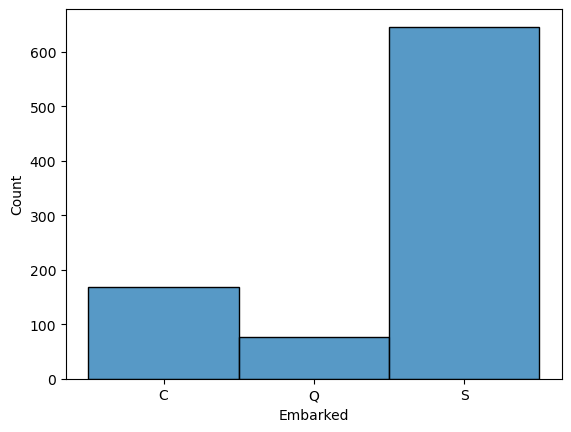

In [40]:
# distribution of Embarked variable, and it's impact on Survival rate
sns.histplot(data=titanic, x='Embarked')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Embarked', ylabel='Survived'>

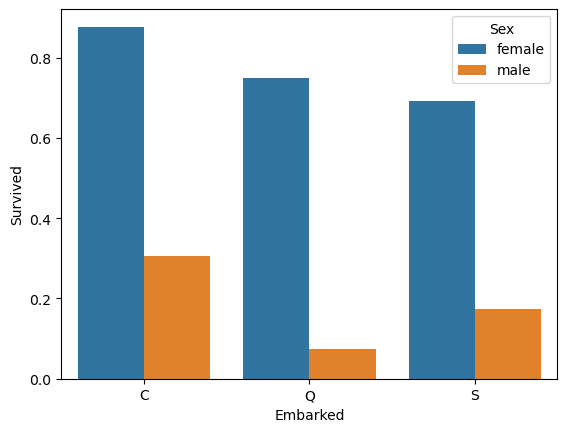

In [41]:
sns.barplot(data=titanic, x='Embarked', y='Survived', hue='Sex', errorbar=None)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

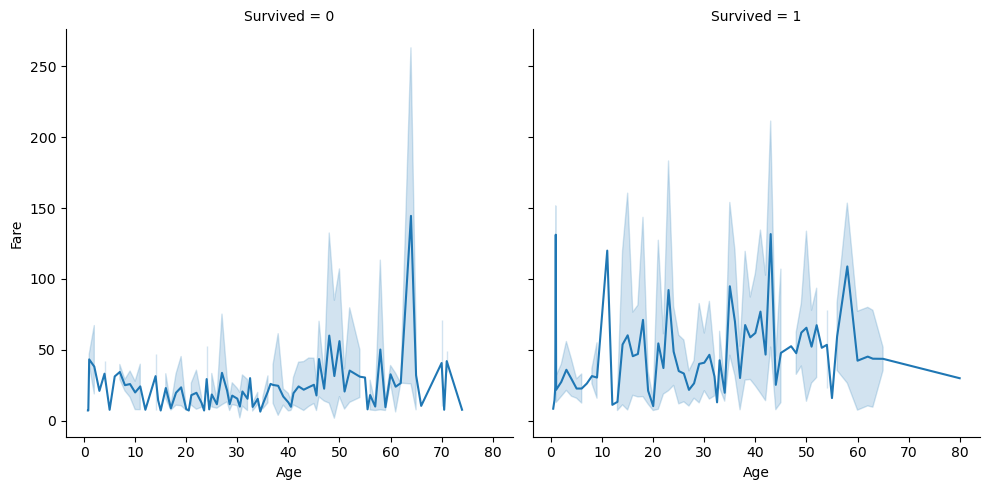

In [42]:
# How would you visualize the correlation between numeric features like 'Age', 'Fare', and survival?
sns.relplot(kind='line', data=titanic, x='Age', y='Fare', col='Survived')

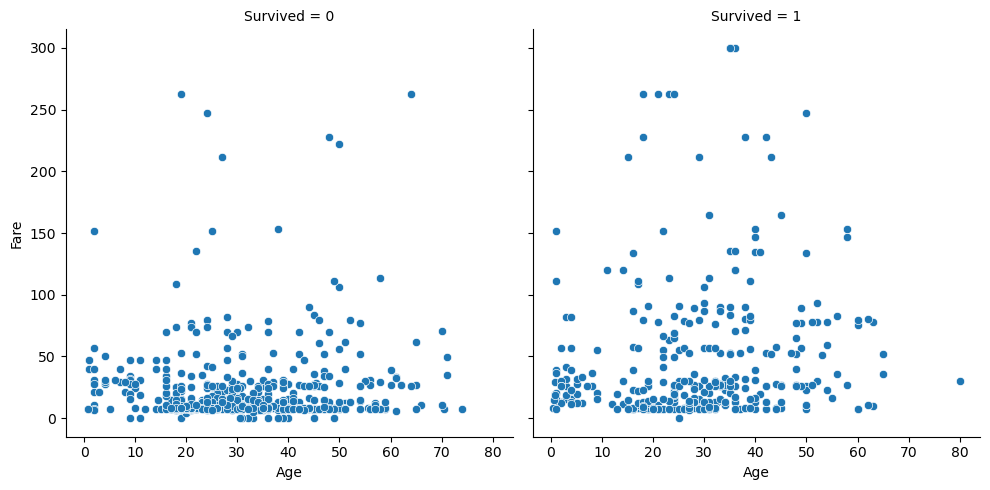

In [43]:
sns.relplot(kind='scatter', data=titanic, x='Age', y='Fare', col='Survived')

In [44]:
titanic['Survive']=titanic['Survived'].apply(
    lambda x: "Yes" if x==0 else "No"
)

<Axes: xlabel='SibSp', ylabel='Survived'>

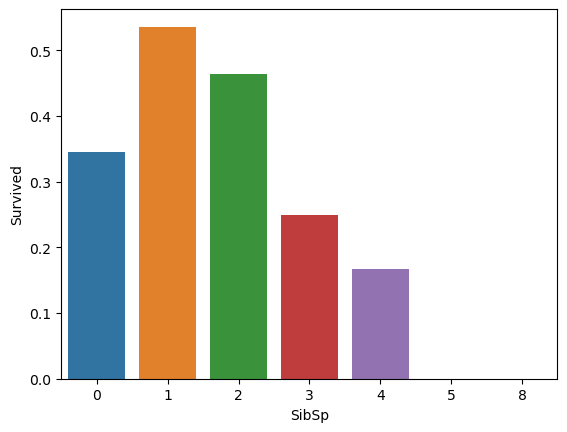

In [45]:
# What patterns can you find from the 'SibSp' and 'Parch' columns in relation to survival?
sns.barplot(data=titanic, x='SibSp', y='Survived', errorbar=None)

<Axes: xlabel='Parch', ylabel='Survived'>

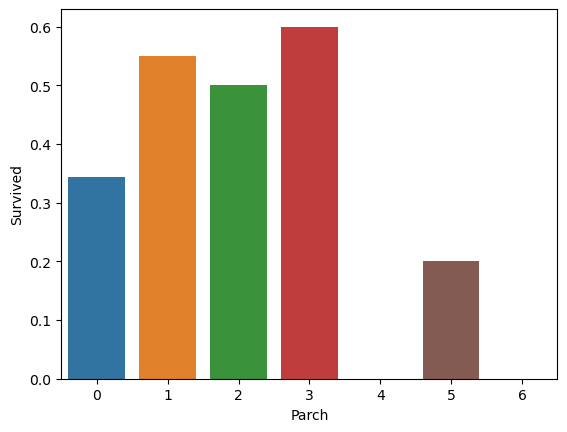

In [46]:
sns.barplot(data=titanic, x='Parch', y='Survived', errorbar=None)

<Axes: xlabel='Survive', ylabel='Age'>

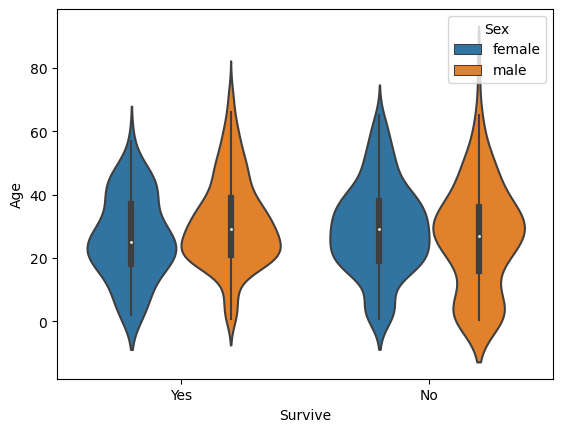

In [47]:
# How would you summarize the age distribution for survivors vs. non-survivors?
sns.violinplot(data=titanic, x='Survive', y='Age', hue='Sex')

<Axes: xlabel='Ticket'>

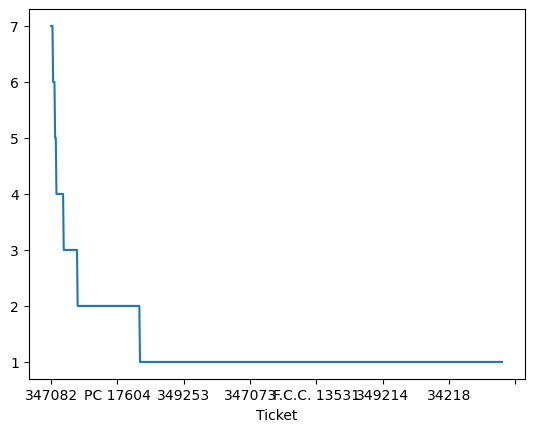

In [48]:
# What is the distribution of the 'Ticket' feature, and does it provide any useful insights?
titanic.Ticket.value_counts().sort_values(ascending=False).plot()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Embarked', ylabel='Survived'>

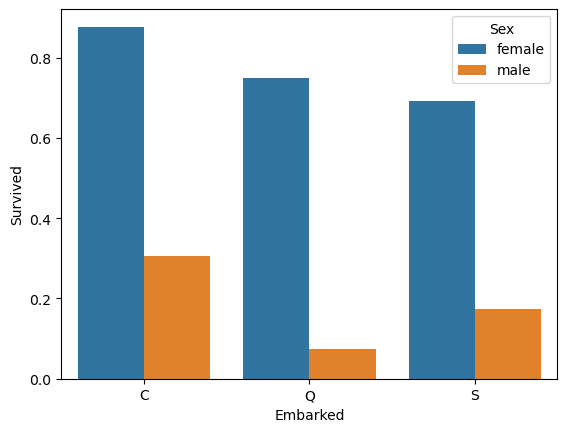

In [338]:
# Can you visualize and compare the survival rate based on the 'Embarked' feature?
sns.barplot(data=titanic, x='Embarked', y='Survived', hue='Sex', errorbar=None)

In [340]:
# survial rate difference between males and females
males=titanic[titanic['Sex']=='male']
females=titanic[titanic['Sex']=='female']

In [350]:
percentage_of_males_survived=males.Survived.sum()/males.shape[0]*100
percentage_of_females_survived=females.Survived.sum()/females.shape[0]*100

In [352]:
percentage_of_females_survived, percentage_of_males_survived

(74.20382165605095, 18.890814558058924)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sex', ylabel='Survived'>

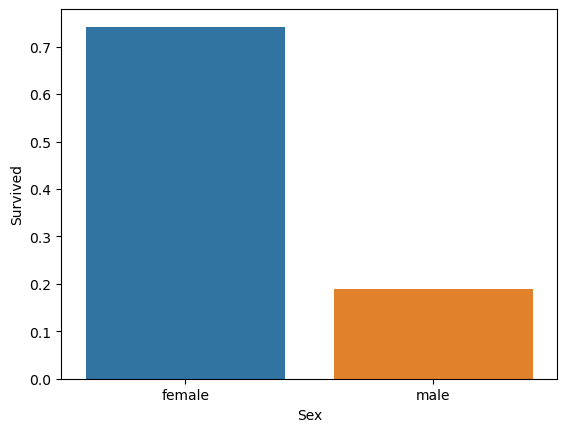

In [356]:
# visualising the above data
sns.barplot(data=titanic, x='Sex', y='Survived', errorbar=None)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


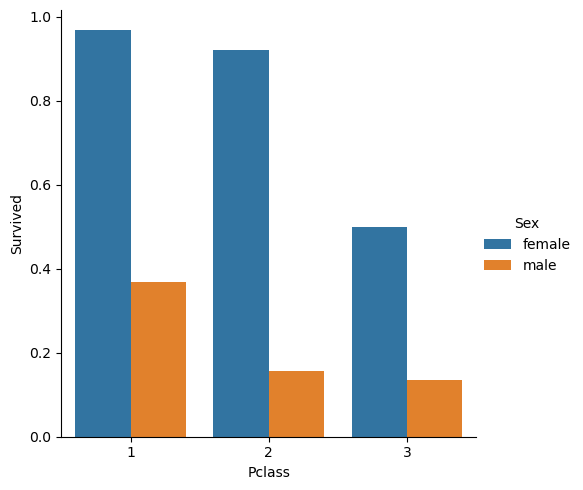

In [362]:
# relationship between Pclass and survival rate
sns.catplot(kind='bar', data=titanic, x='Pclass', y='Survived', hue='Sex', errorbar=None)

<Axes: xlabel='Survived', ylabel='Age'>

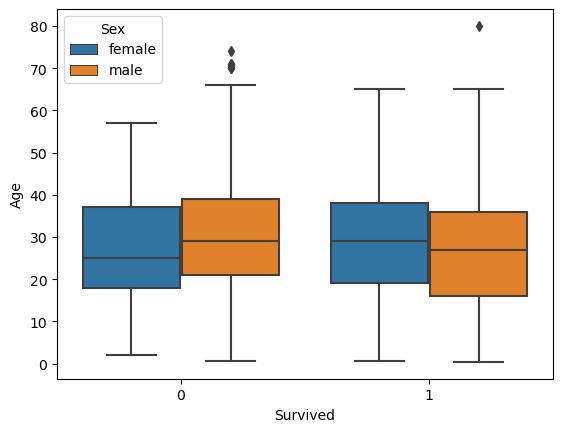

In [366]:
# Age distribution across different survival outcome
sns.boxplot(data=titanic, x='Survived', y='Age', hue='Sex')

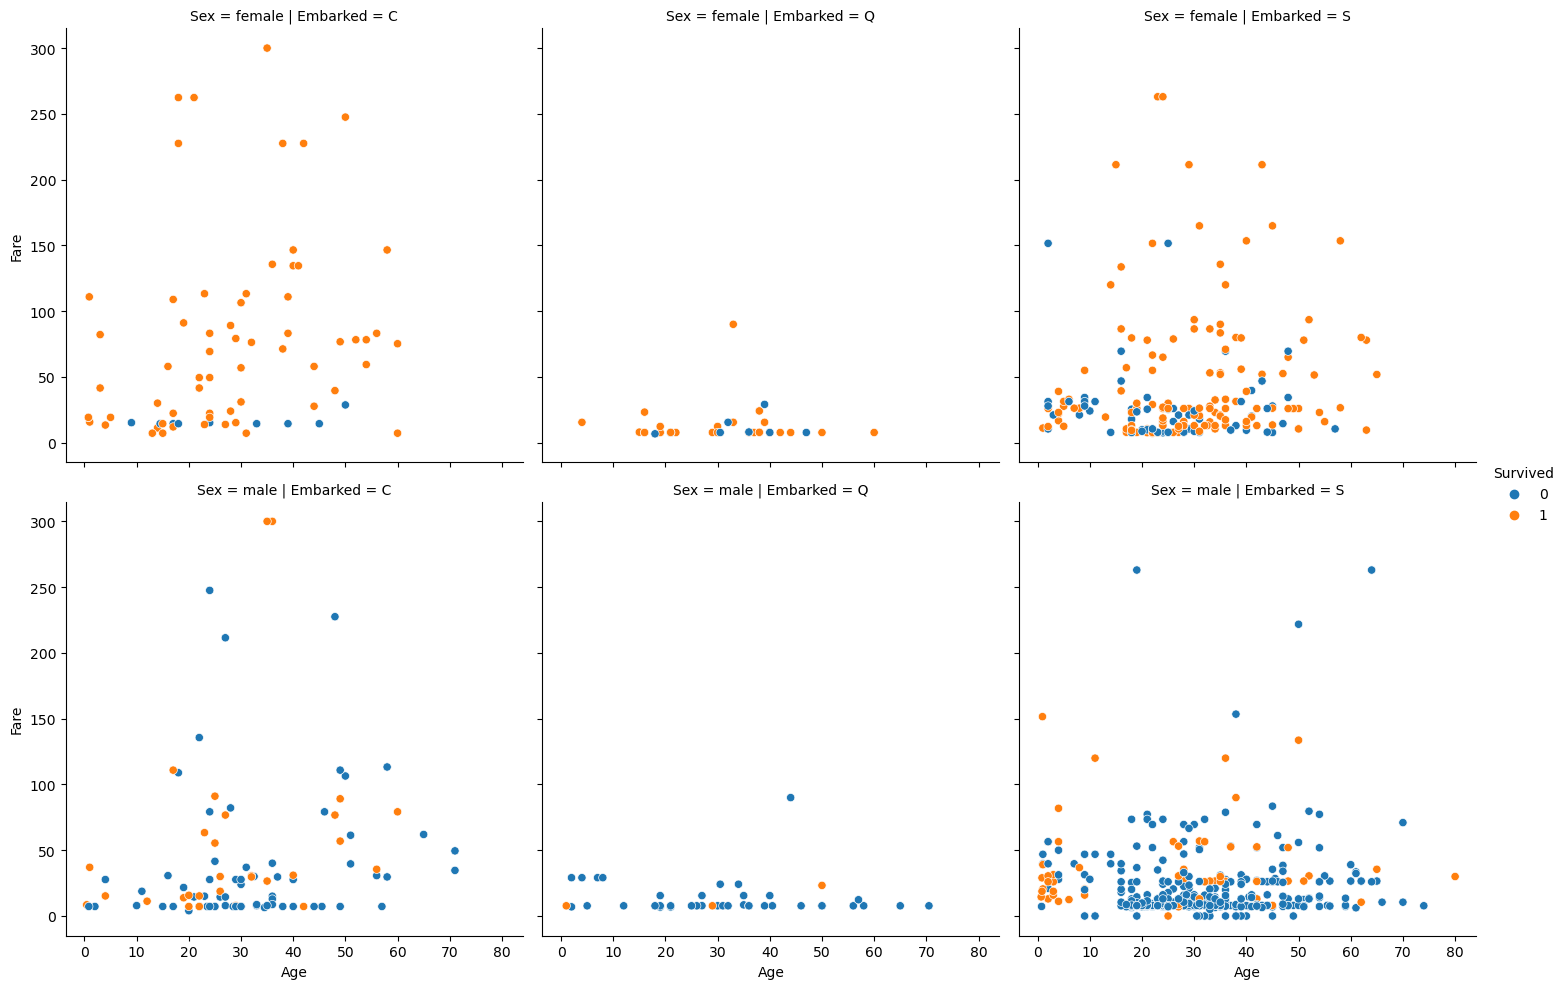

In [378]:
# What is the correlation between 'Age' and 'Fare'? Does it suggest any underlying relationship?
sns.relplot(kind='scatter', data=titanic, x='Age', y='Fare', col='Embarked', row='Sex', hue='Survived')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


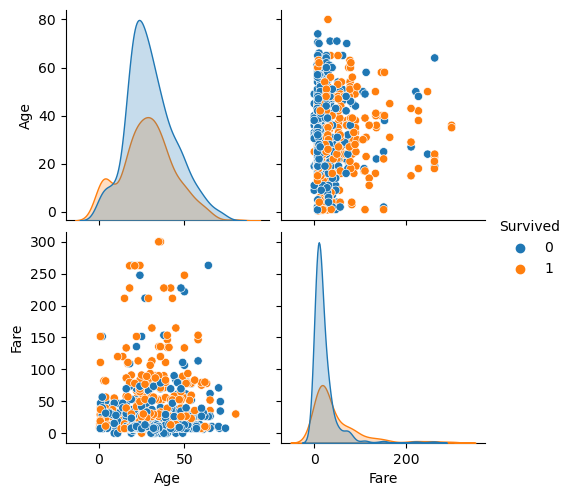

In [386]:
# Can you use Seaborn’s pairplot to explore relationships between 'Age', 'Fare', and survival?
sns.pairplot(
    data=titanic[['Age', 'Fare', 'Survived']],
    hue='Survived'
)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

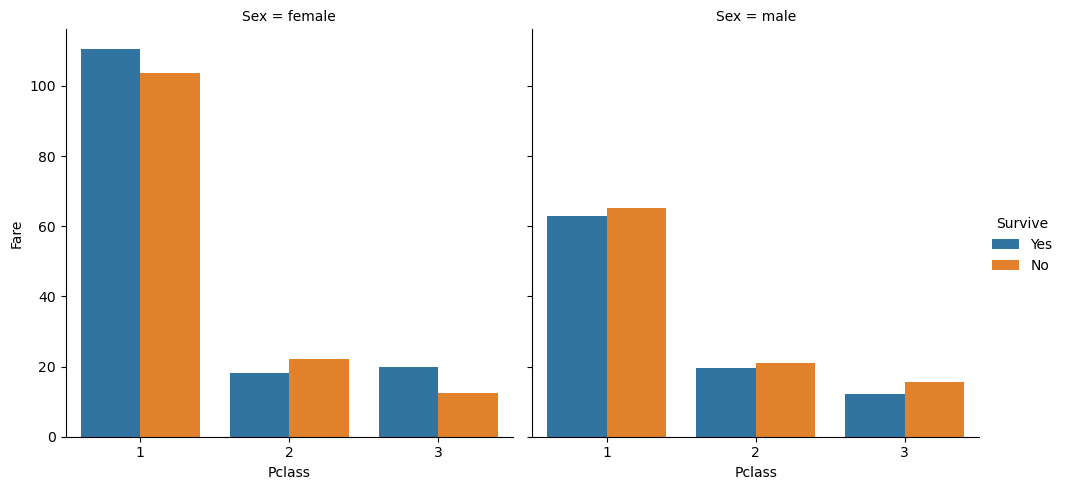

In [390]:
# visualising Pclass and Fare
sns.catplot(kind='bar', data=titanic, x='Pclass', y='Fare', hue='Survive', col='Sex', errorbar=None)

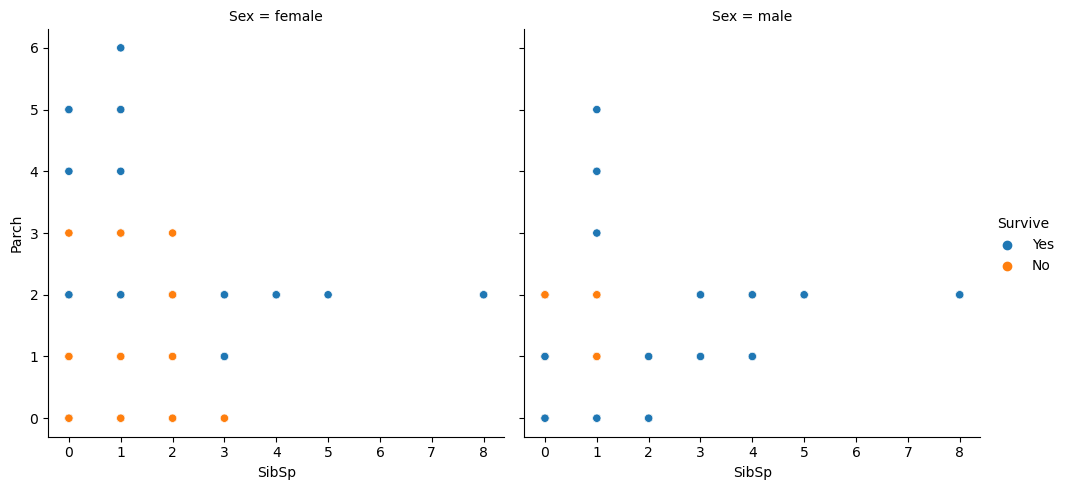

In [406]:
# How does the survival rate vary with both 'SibSp' and 'Parch' columns together?

sns.relplot(kind='scatter', data=titanic, x='SibSp', y='Parch', hue='Survive', col='Sex')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

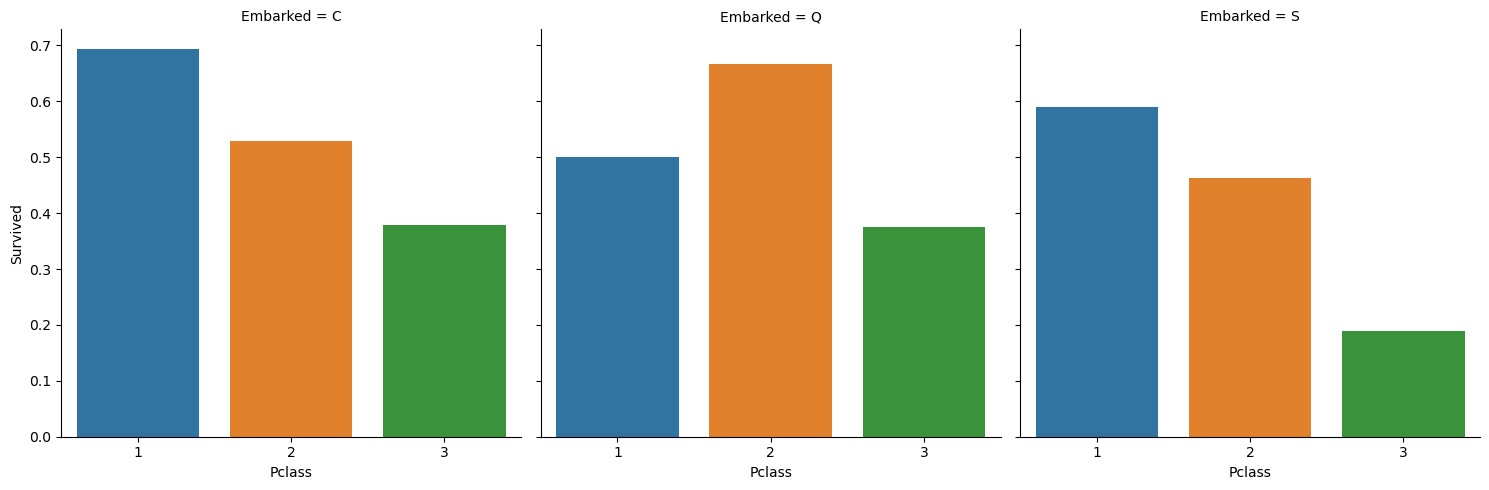

In [412]:
# How does the 'Embarked' feature influence survival, and does it differ across Pclass?
sns.catplot(kind='bar', data=titanic, x='Pclass', y='Survived', errorbar=None, col='Embarked')

<Axes: xlabel='Parch', ylabel='Survived'>

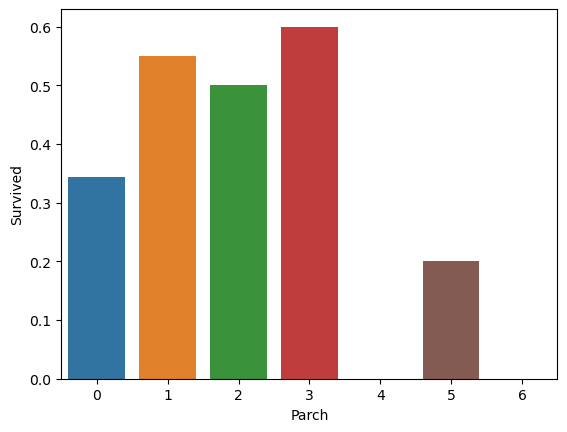

In [416]:
# Parch relation with survival, SibSp relation with survival

sns.barplot(data=titanic, x='Parch', y='Survived', errorbar=None)

<Axes: xlabel='SibSp', ylabel='Survived'>

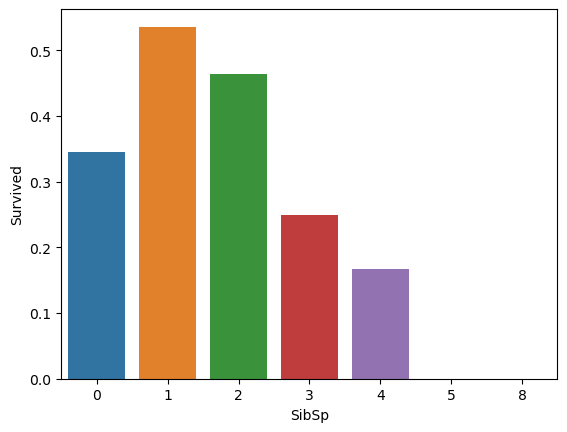

In [418]:
sns.barplot(data=titanic, x='SibSp', y='Survived', errorbar=None)

<Axes: xlabel='Survived', ylabel='Age'>

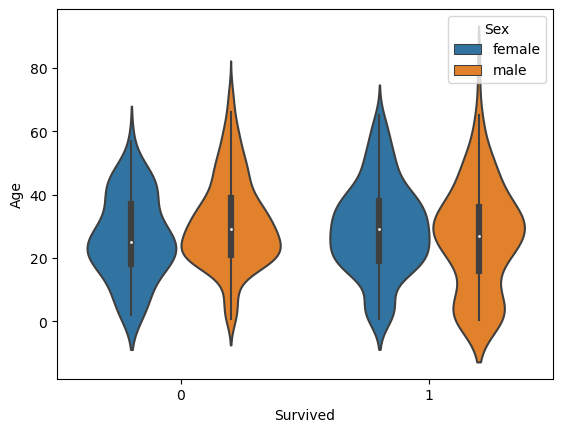

In [424]:
# Age and Fare Distribution

sns.violinplot(data=titanic, x='Survived', y='Age', hue='Sex')

<Axes: xlabel='Survived', ylabel='Fare'>

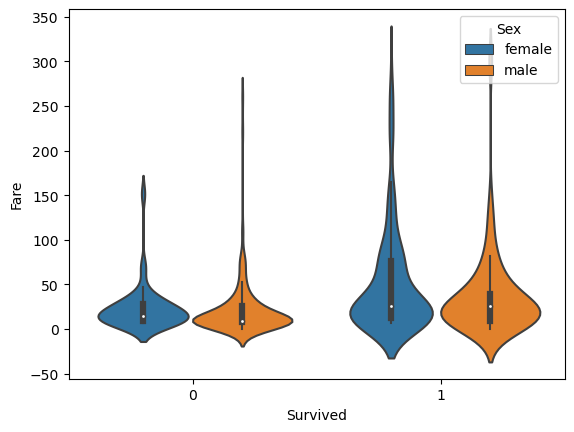

In [426]:
sns.violinplot(data=titanic, x='Survived', y='Fare', hue='Sex')

### 3. Feature Engineering

   - Can you create a 'Family Size' feature by combining 'SibSp' and 'Parch'?
   - How would you extract titles from the 'Name' column and use them in the analysis?

In [51]:
# creating new feature using SibSp and Parch
titanic['FamilySize']=titanic.SibSp+titanic.Parch

In [114]:
# Can you create a 'Title' feature from the 'Name' column (e.g., Mr., Mrs., Miss)? How would it help in the analysis?
# first extract the names from the given dataframe
fullname=titanic.Name
fullname

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [122]:
# now split the name on the basis of (,)
lastname=fullname.apply(
    lambda name: name.split(',')[0]
)

In [132]:
firstname=fullname.apply(
    lambda name: name.split(',')[1]
)
firstname=firstname.str.strip() # this will remove the trailing spaces from starting and ending

In [148]:
title=firstname.apply(lambda val: val.split(" ", 1)[0]).str.strip('.')
titanic['Title']=title

In [152]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survive,FamilySize,Title
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,B96 B98,S,No,0,Miss
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,B96 B98,S,Yes,0,Mr
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,B96 B98,S,Yes,0,Mr
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,No,1,Miss
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,B96 B98,S,No,0,Miss


In [162]:
# Would you create a 'Fare per Person' feature? If so, how would it be useful?
total_fare=titanic.Fare.sum()
total_fare

28056.9617

In [164]:
# fare per person, calculating using total_fare/total_persons
total_fare/titanic.shape[0]

31.489294837261504

In [177]:
# How can you extract useful information from the 'Cabin' column by splitting it into 'Cabin letter' and 'Cabin number'?
cabin_letter=titanic.Cabin.str.strip().apply(lambda cabin_name: cabin_name[0])

In [201]:
def filter_cabin_no(vals):
    res=[]

    for name in vals.strip().split(" "):
        res.append(name[1:])
    return ",".join(res)

In [207]:
cabin_no=titanic.Cabin.str.strip().apply(filter_cabin_no)

In [216]:
titanic['Cabin No.']=cabin_no
titanic['Deck']=cabin_letter

In [222]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survive,FamilySize,Title,Cabin No.,Deck
388,389,0,3,"Sadlier, Mr. Matthew",male,36.0,0,0,367655,7.7292,B96 B98,Q,Yes,0,Mr,"96,98",B
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,B96 B98,C,Yes,2,Mr,"96,98",B
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,B96 B98,S,Yes,2,Mr,"96,98",B
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Yes,0,Mr,24,A
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,B96 B98,S,No,0,Mr,"96,98",B


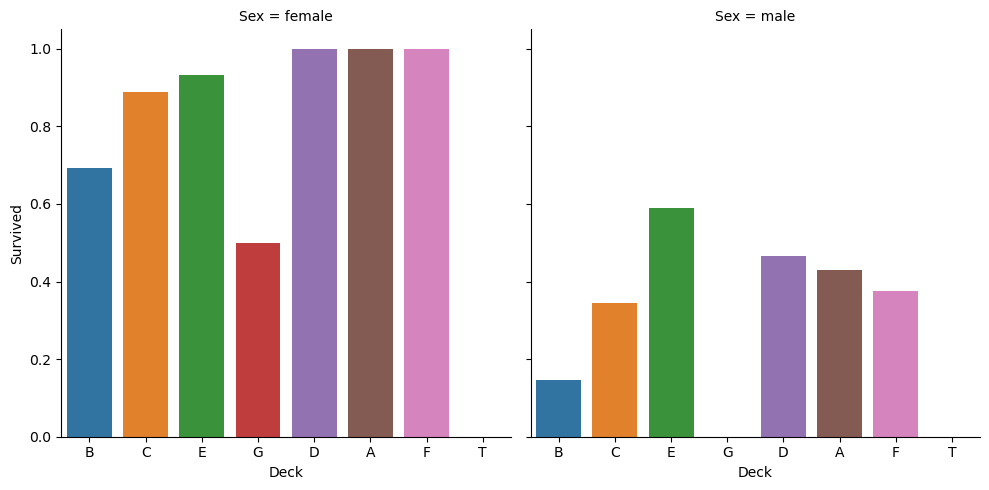

In [232]:
# how deck impact survival analysis
sns.catplot(kind='bar', data=titanic, x='Deck', y='Survived', errorbar=None, col='Sex')

In [269]:
# How could you categorize passengers into different age groups (e.g., child, adult, senior) and analyze their survival rates?

# considering the child: whose age is below or equal to 18
# adult: age greater than or equal to 50
# seniors: age greater than 50 are all considered as seniors

In [251]:
def categorise_age_into_groups(age):
    if age<=18:
        return 'C' # means it's a children
    elif age>18 and age<=50:
        return 'A' # meaning an adult
    else:
        return 'S' # otherwise it would be a senior

In [259]:
res=titanic.Age.apply(categorise_age_into_groups)

In [265]:
titanic['AgeGroup']=res.astype('category')

In [267]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survive,FamilySize,Title,Cabin No.,Deck,AgeGroup
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C,No,1,Mrs,20,D,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,B96 B98,S,Yes,0,Mr,"96,98",B,A
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,B96 B98,S,Yes,0,Mr,"96,98",B,A
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S,No,1,Mrs,121,E,A
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q,No,1,Miss,78,C,A


C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

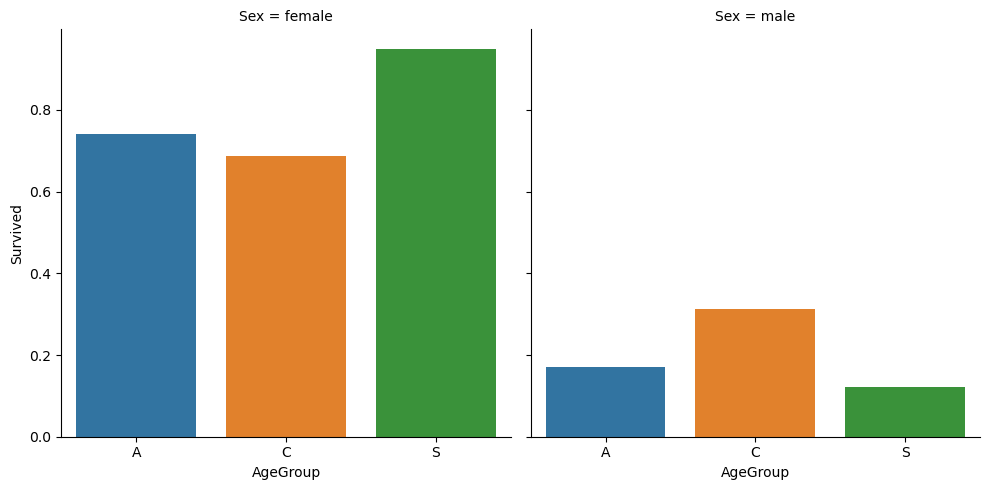

In [273]:
# visulaising survival rate of age groups
sns.catplot(kind='bar', data=titanic, x='AgeGroup', y='Survived', col='Sex', errorbar=None)

### 4. Data Visualization

   - How do you visualize the correlation between 'Age' and 'Survived'?
   - Can you use a stacked bar plot to compare survival rates across classes and genders?

In [279]:
# What can you conclude from visualizing survival rates using a heatmap of correlations among numeric features?
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int8    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  Survive      891 non-null    object  
 13  FamilySize   891 non-null    int8    
 14  Title        891 non-null    object  
 15  Cabin No.    891 non-null    object  
 16  Deck         891 non-null    object  
 17  AgeGroup     891 non-null    category
dtypes: category(4), float64(2), in

<Axes: >

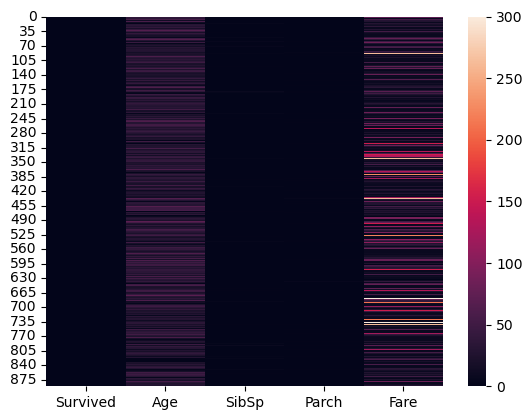

In [287]:
sns.heatmap(data=titanic[
    [ 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']
])

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pclass', ylabel='Sex'>

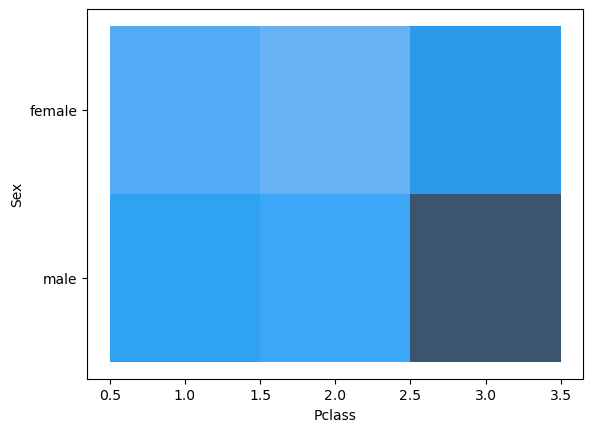

In [297]:
# stacked bar chart for gender and passenger class
sns.histplot(
    multiple='stack',
    data=titanic,
    y='Sex',
    x='Pclass'
)

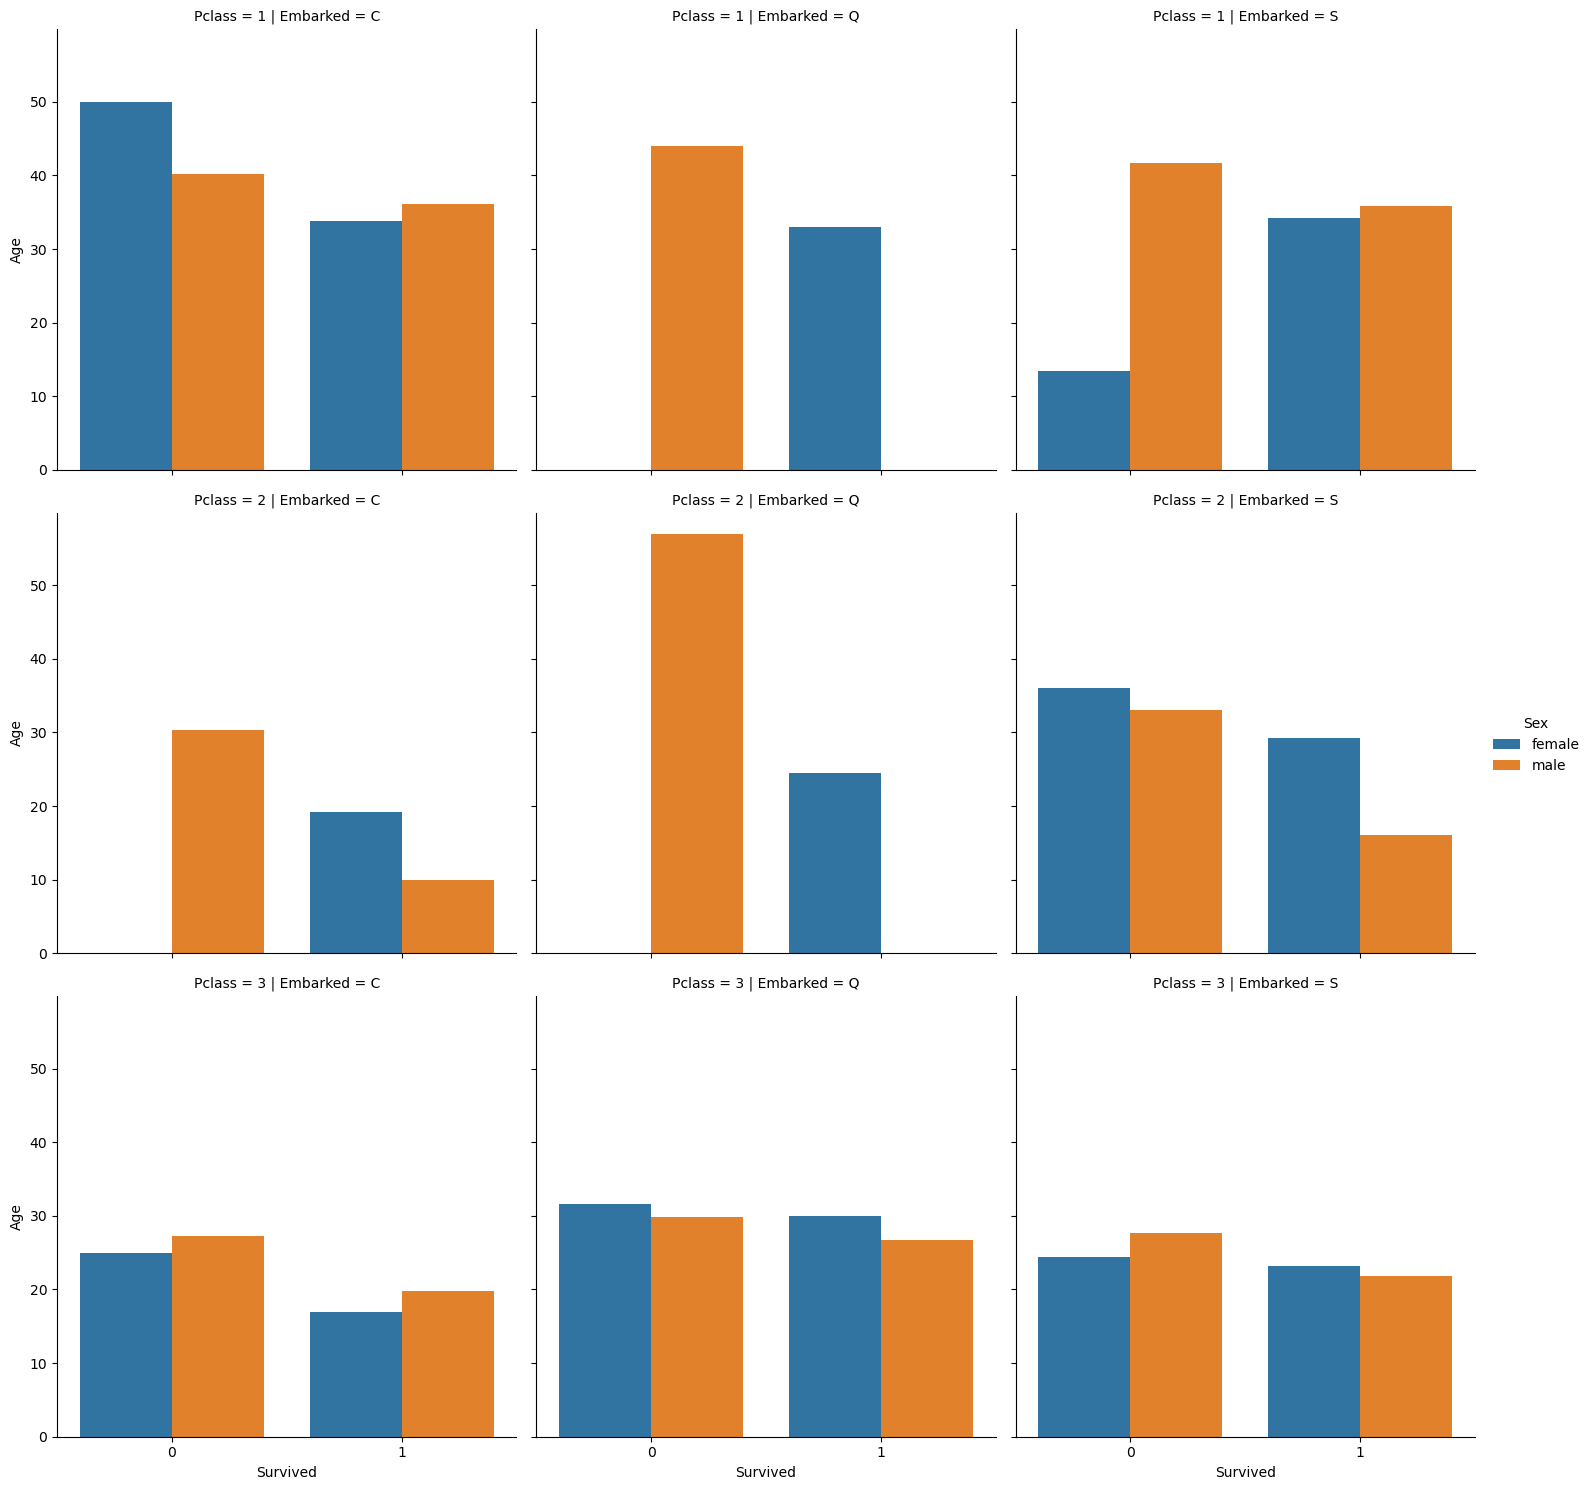

In [306]:
# What insights can you derive from plotting survival against 'Age' using Seaborn’s *FacetGrid*?
sns.catplot(
    kind='bar',
    data=titanic,
    y='Age',
    x='Survived',
    hue='Sex',
    row='Pclass',
    col='Embarked',
    errorbar=None
)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Embarked', ylabel='count'>

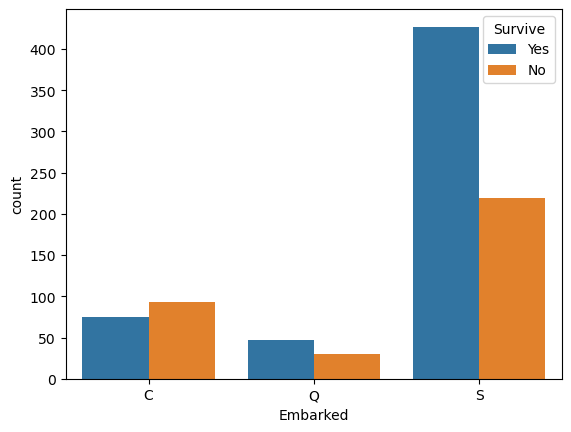

In [318]:
# Can you use a *countplot* to visualize the relationship between 'Embarked' and survival? 
# How would you interpret the results?

sns.countplot(data=titanic, x='Embarked', hue='Survive')

<Axes: xlabel='Survived', ylabel='Fare'>

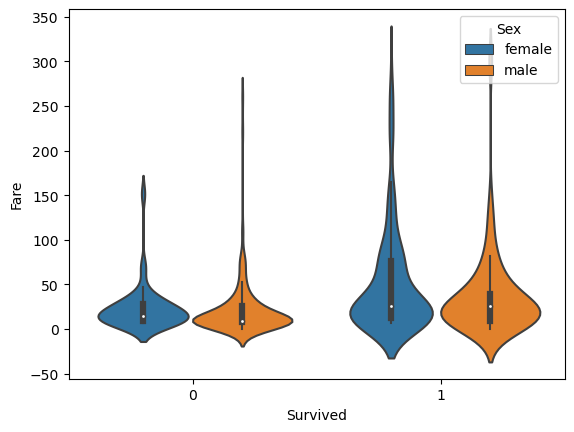

In [324]:
# Can you create a violin plot to show the spread of 'Fare' for both survivors and non-survivors?
sns.violinplot(data=titanic, x='Survived', y='Fare', hue='Sex')

<Axes: xlabel='Survived', ylabel='SibSp'>

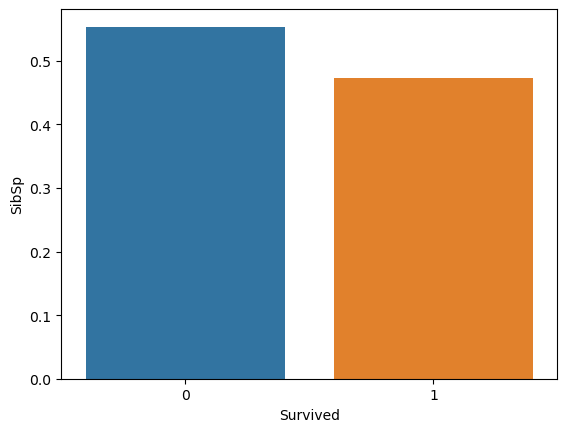

In [336]:
sns.barplot(data=titanic, x='Survived', y='SibSp', errorbar=None)

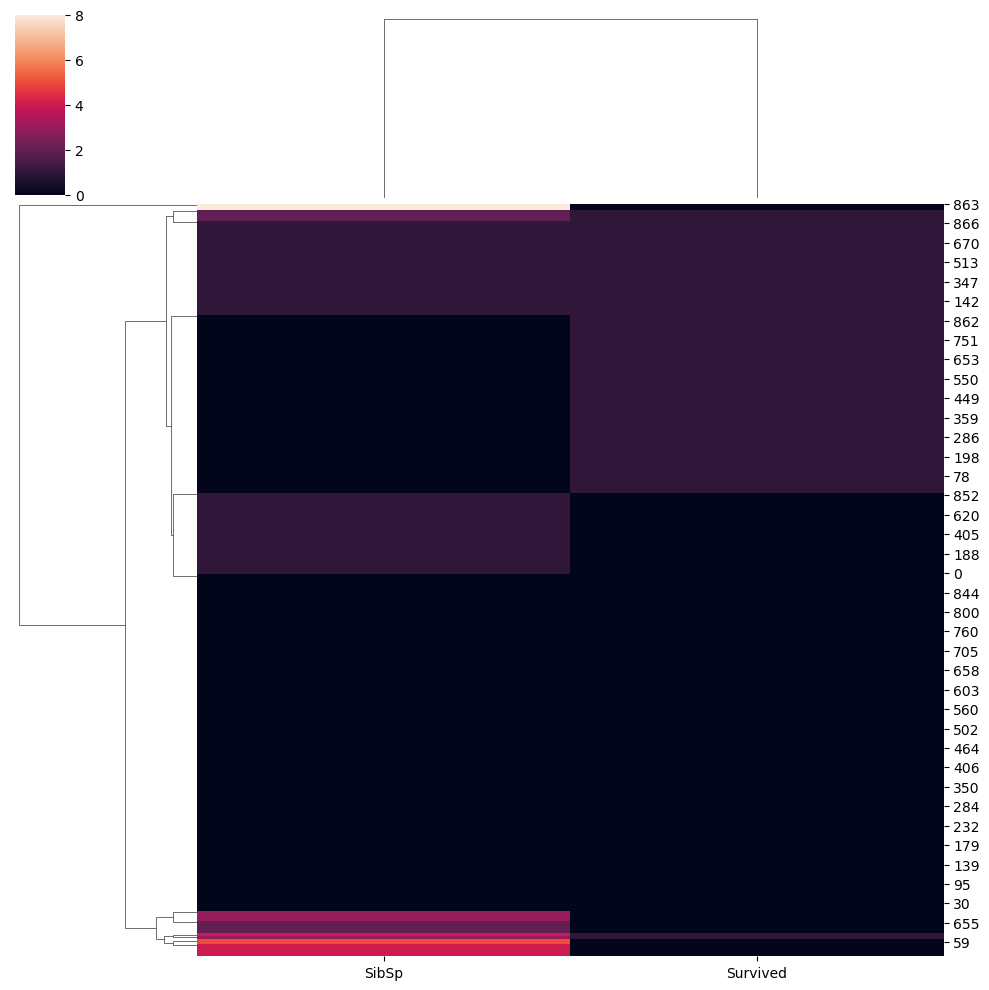

In [332]:
# heatmap for relationship between SibSp and survival
sns.clustermap(data=titanic[['SibSp', 'Survived']])

### Conclusion & Key Insights

Through the exploration of key questions such as the relationship between 'Fare' and survival, the impact of passenger class on survival rates, and the handling of missing data in 'Age', I was able to uncover valuable insights that inform the likelihood of survival. 